# Boundary Issues in convolution

## 1. CLIP FILTER
## 2. WRAP AROUND
## 3. REFLECT ACROSS EDGE

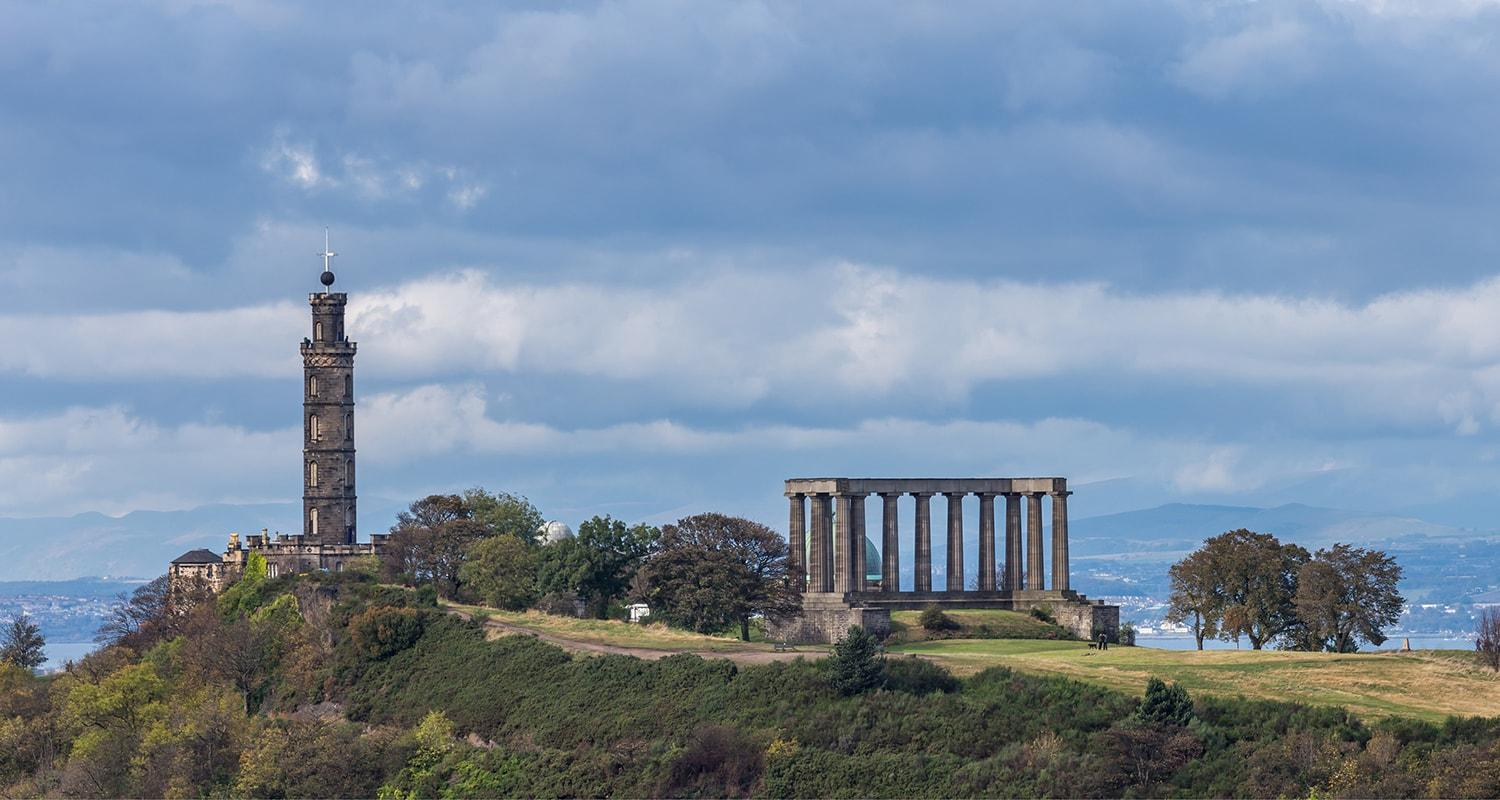

In [24]:
import numpy as np
from PIL import Image as image
from IPython.display import display, Image
from io import BytesIO

img = np.array(image.open('monument.jpg'))
f = BytesIO()
image.fromarray(img.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

In [25]:
def Gaussian(shape=(3, 3), sigma=1):
    m,n = [(s-1)/2 for s in shape]
    y, x = np.ogrid[-m:m+1, -n:n+1]
    gauss = 1/(2*np.pi*(sigma**2))*np.exp(-(x**2+y**2)/(2*sigma**2))
    su = gauss.sum()
    if not su:
        gauss/=su
    return gauss

In [26]:
filterShape = (11, 11)

[150. 174. 212.]


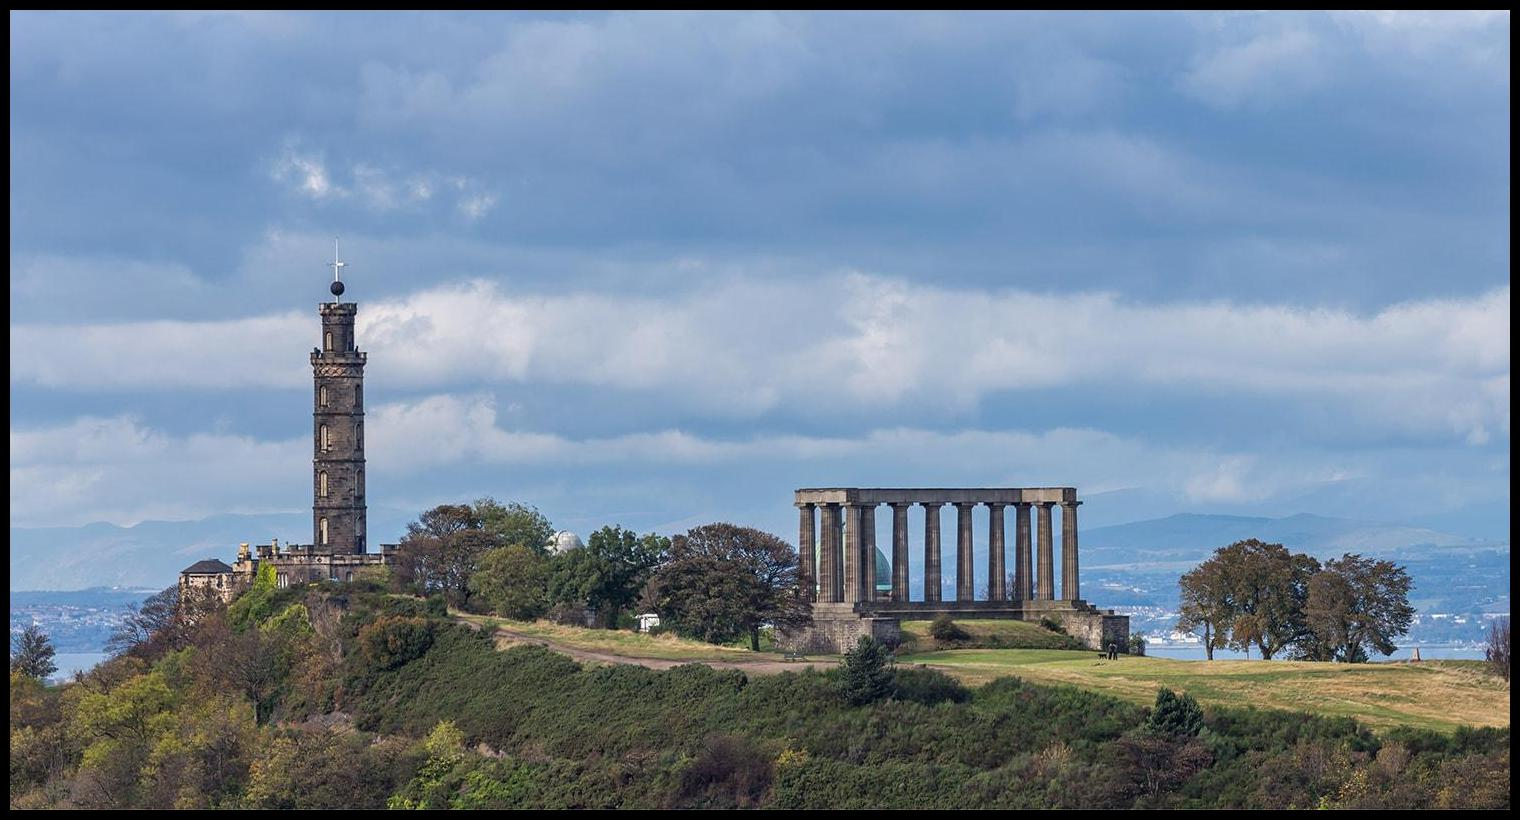

In [28]:
## clip Filter - Full padding - with zeros

height, width, channels = img.shape
filterPixels = filterShape[0]-1

clipFilter = np.zeros((height+2*filterPixels, width+2*filterPixels, channels))
clipFilter[filterPixels:filterPixels+height, filterPixels:filterPixels+width] = img
f = BytesIO()
image.fromarray(clipFilter.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

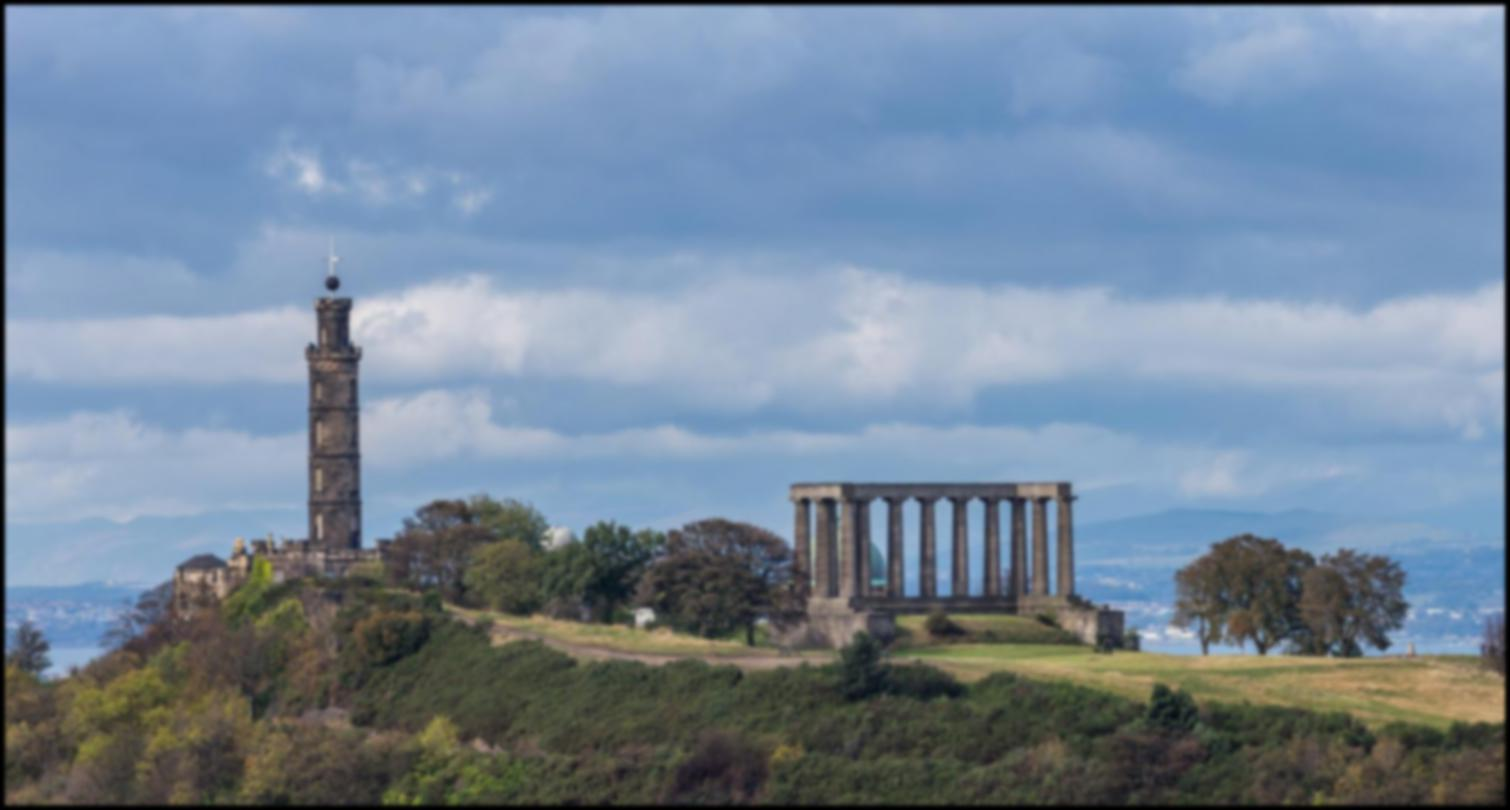

In [32]:
gauss1 = Gaussian(shape=filterShape, sigma=2)
gaussian1 = np.zeros((clipFilter.shape[0]-filterPixels, clipFilter.shape[1]-filterPixels, 3))

for i in range(clipFilter.shape[0]-filterPixels):
    for j in range(clipFilter.shape[1]-filterPixels):
        gaussian1[i][j][0] = np.sum(np.multiply(clipFilter[i:i+filterPixels+1, j:j+filterPixels+1, 0], gauss1))
        gaussian1[i][j][1] = np.sum(np.multiply(clipFilter[i:i+filterPixels+1, j:j+filterPixels+1, 1], gauss1))
        gaussian1[i][j][2] = np.sum(np.multiply(clipFilter[i:i+filterPixels+1, j:j+filterPixels+1, 2], gauss1))
        

f = BytesIO()
image.fromarray(gaussian1.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

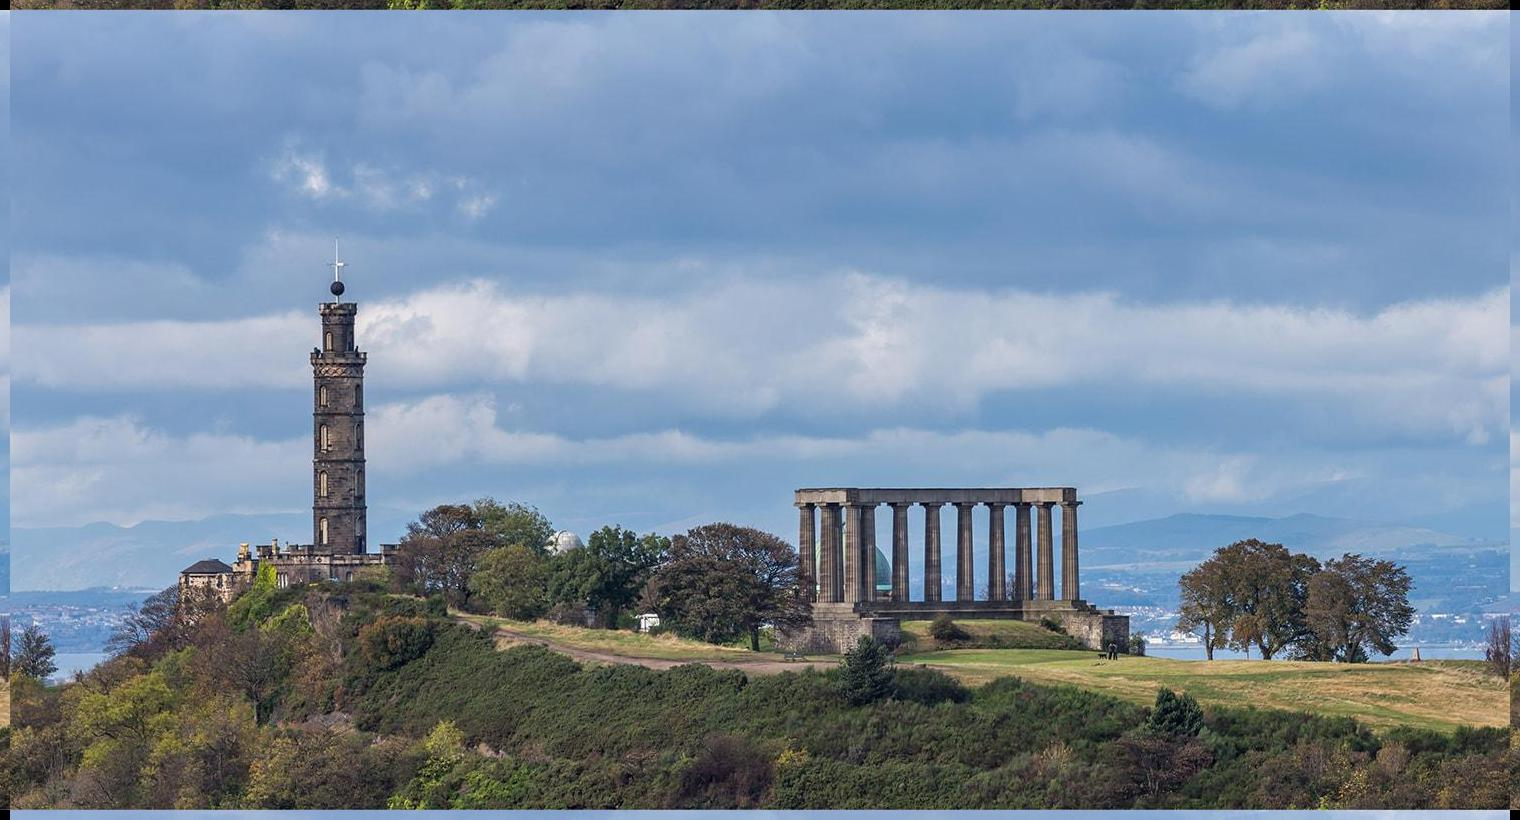

In [39]:
## Wrap Around - Full padding - with wrapping around

wrapAround = np.zeros((height+2*filterPixels, width+2*filterPixels, channels))
wrapAround[filterPixels:filterPixels+height, filterPixels:filterPixels+width] = img
wrapAround[0:filterPixels, filterPixels:filterPixels+width] = img[height-filterPixels:height, :]
wrapAround[wrapAround.shape[0]-filterPixels:wrapAround.shape[0], filterPixels:filterPixels+width] = img[0:filterPixels,:]
wrapAround[filterPixels:filterPixels+height, 0:filterPixels] = img[:, width-filterPixels:width]
wrapAround[filterPixels:filterPixels+height, wrapAround.shape[1]-filterPixels:wrapAround.shape[1]] = img[:, 0:filterPixels]

f = BytesIO()
image.fromarray(wrapAround.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

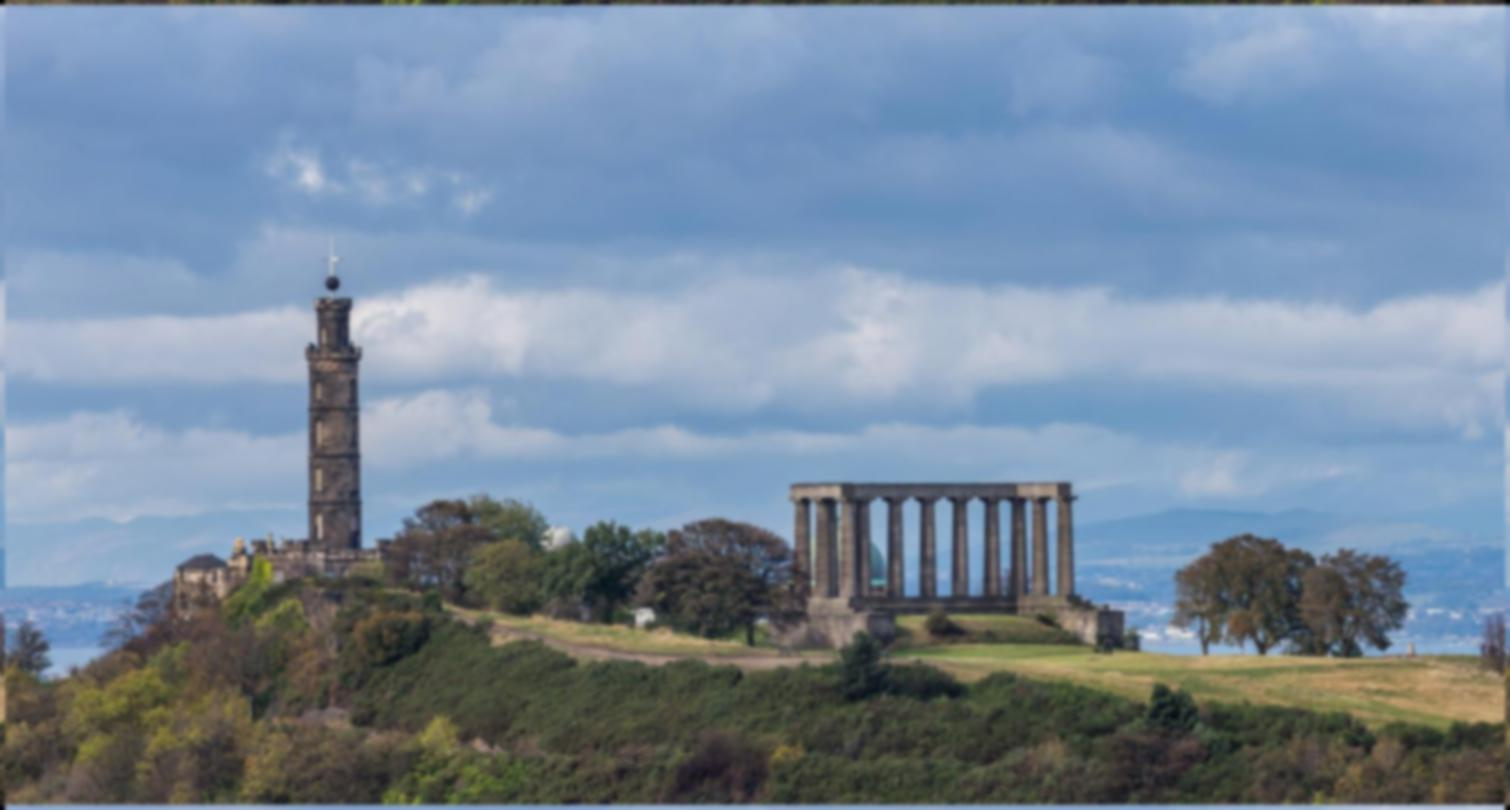

In [40]:
gauss2 = Gaussian(shape=filterShape, sigma=2)
gaussian2 = np.zeros((wrapAround.shape[0]-filterPixels, wrapAround.shape[1]-filterPixels, 3))

for i in range(wrapAround.shape[0]-filterPixels):
    for j in range(wrapAround.shape[1]-filterPixels):
        gaussian2[i][j][0] = np.sum(np.multiply(wrapAround[i:i+filterPixels+1, j:j+filterPixels+1, 0], gauss2))
        gaussian2[i][j][1] = np.sum(np.multiply(wrapAround[i:i+filterPixels+1, j:j+filterPixels+1, 1], gauss2))
        gaussian2[i][j][2] = np.sum(np.multiply(wrapAround[i:i+filterPixels+1, j:j+filterPixels+1, 2], gauss2))
        

f = BytesIO()
image.fromarray(gaussian2.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

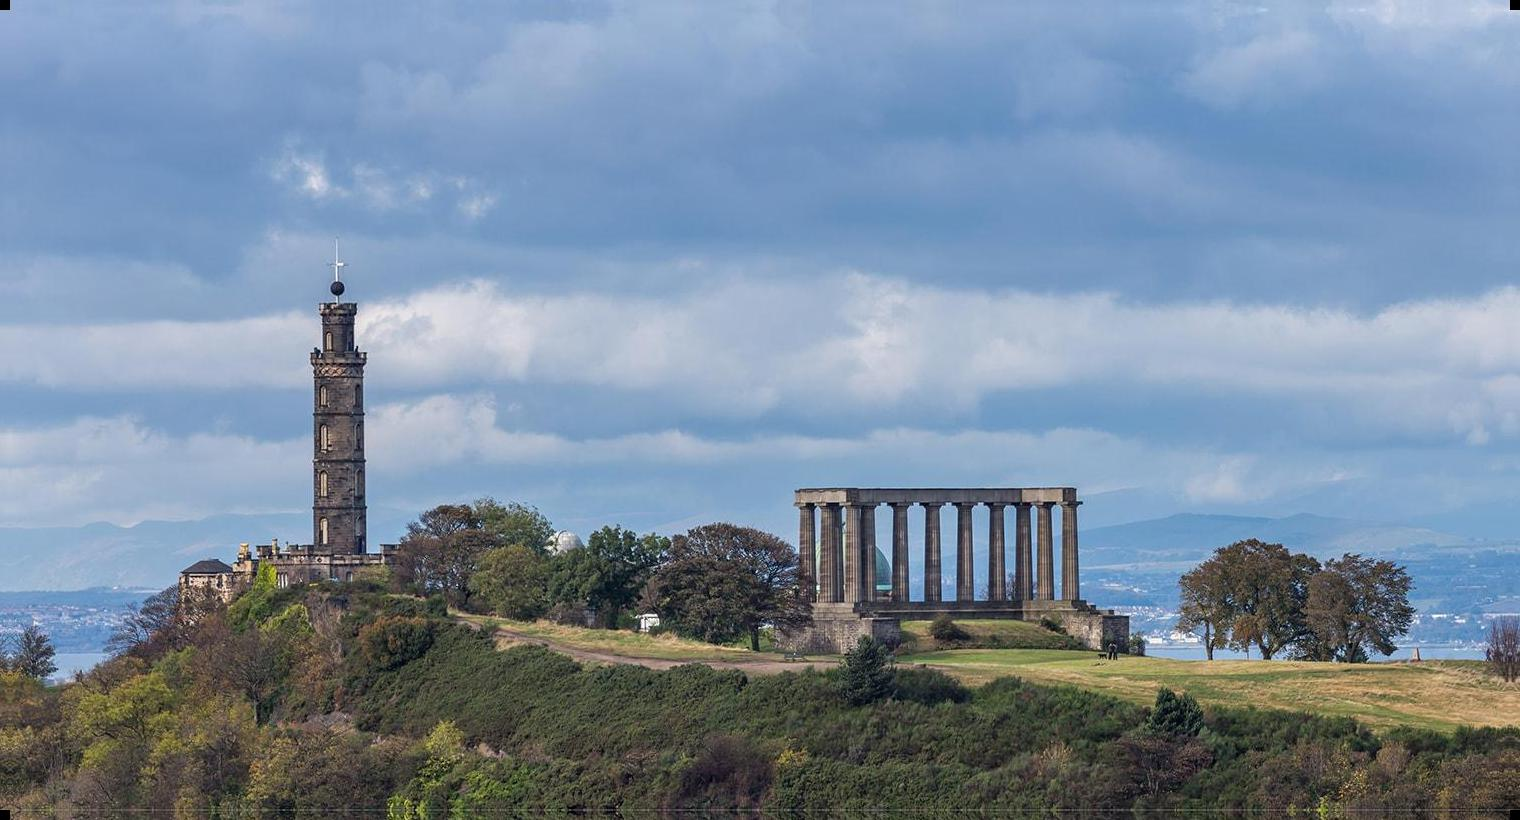

In [47]:
## reflect across edge - Full padding - with reflect edge

reflectFilter = np.zeros((height+2*filterPixels, width+2*filterPixels, channels))
reflectFilter[filterPixels:filterPixels+height, filterPixels:filterPixels+width] = img

reflectFilter[0:filterPixels, filterPixels:filterPixels+width] = np.flip(img[0:filterPixels,:], axis=0)
reflectFilter[wrapAround.shape[0]-filterPixels:wrapAround.shape[0], filterPixels:filterPixels+width] = np.flip(img[height-filterPixels:height, :], axis=0)
reflectFilter[filterPixels:filterPixels+height, 0:filterPixels] = np.flip(img[:, 0:filterPixels], axis=1)
reflectFilter[filterPixels:filterPixels+height, wrapAround.shape[1]-filterPixels:wrapAround.shape[1]] = np.flip(img[:, width-filterPixels:width], axis=1)


f = BytesIO()
image.fromarray(reflectFilter.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

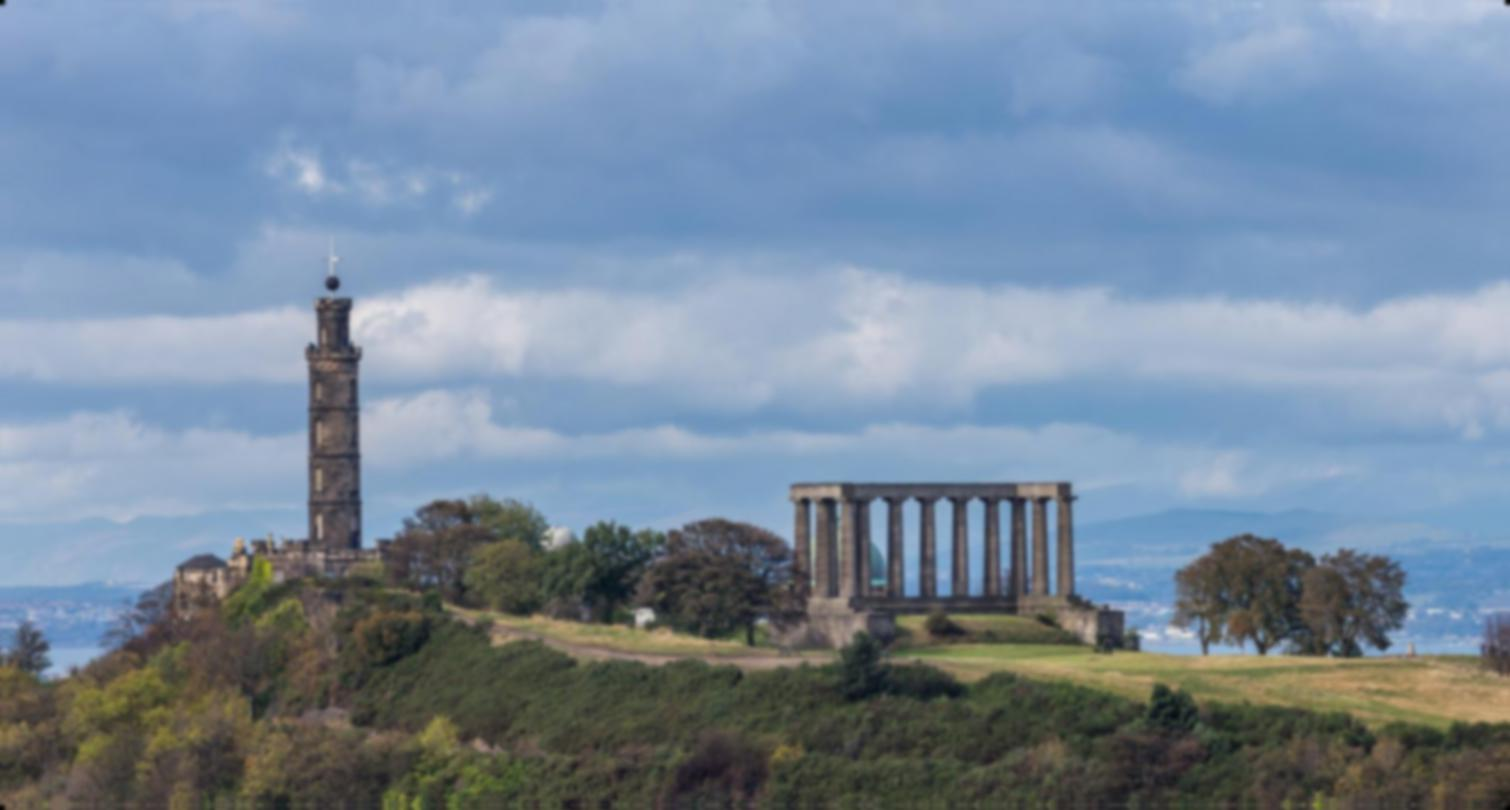

In [48]:
gauss3 = Gaussian(shape=filterShape, sigma=2)
gaussian3 = np.zeros((reflectFilter.shape[0]-filterPixels, reflectFilter.shape[1]-filterPixels, 3))

for i in range(reflectFilter.shape[0]-filterPixels):
    for j in range(reflectFilter.shape[1]-filterPixels):
        gaussian3[i][j][0] = np.sum(np.multiply(reflectFilter[i:i+filterPixels+1, j:j+filterPixels+1, 0], gauss3))
        gaussian3[i][j][1] = np.sum(np.multiply(reflectFilter[i:i+filterPixels+1, j:j+filterPixels+1, 1], gauss3))
        gaussian3[i][j][2] = np.sum(np.multiply(reflectFilter[i:i+filterPixels+1, j:j+filterPixels+1, 2], gauss3))
        

f = BytesIO()
image.fromarray(gaussian3.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))